In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load the datasets
completions = pd.read_csv('IPEDS_Completions_2022.csv')
institutions = pd.read_csv('IPEDS_IC.csv')
Directory = pd.read_csv('IPEDS_Directory.csv')
demographics = pd.read_csv('IPEDS_EFFY.csv')

In [17]:
institutions.head()

,UNITID,PEO1ISTR,PEO2ISTR,PEO3ISTR,PEO4ISTR,PEO5ISTR,PEO6ISTR,PEO7ISTR,CNTLAFFI,PUBPRIME,...,ASSOC5,ASSOC6,SPORT1,CONFNO1,SPORT2,CONFNO2,SPORT3,CONFNO3,SPORT4,CONFNO4
0,100654,0,1,0,0,0,0,0,1,2,...,0,0,1,133,1,133,1,133,1,133
1,100663,0,1,1,0,0,0,0,1,2,...,0,0,1,111,1,111,1,111,1,111
2,100690,0,1,0,0,0,0,0,4,-2,...,0,0,2,-2,2,-2,2,-2,2,-2
3,100706,0,1,1,1,0,0,0,1,2,...,0,0,2,-2,1,146,1,146,1,146
4,100724,1,1,0,0,0,1,1,1,2,...,0,0,1,133,1,133,1,133,1,133


In [18]:
demographics.head()

,UNITID,EFFYALEV,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,...,XEYNRALW,EFYNRALW,XEFYGUUN,EFYGUUN,XEFYGUAN,EFYGUAN,XEFYGUTO,EFYGUTOT,XEFYGUKN,EFYGUKN
0,100654,1,1,999,R,6681,R,2666,R,4015,...,R,48,R,14.0,A,NaN,R,14.0,R,6667.0
1,100654,2,2,1,R,5663,R,2337,R,3326,...,R,24,R,8.0,A,NaN,R,8.0,R,5655.0
2,100654,3,-2,1,R,5621,R,2323,R,3298,...,R,24,A,NaN,A,NaN,A,NaN,A,NaN
3,100654,4,-2,1,R,1680,R,722,R,958,...,R,4,A,NaN,A,NaN,A,NaN,A,NaN
4,100654,5,-2,1,R,3941,R,1601,R,2340,...,R,20,A,NaN,A,NaN,A,NaN,A,NaN


In [19]:
completions.head()

,UNITID,AWLEVELC,XCSTOTLT,CSTOTLT,XCSTOTLM,CSTOTLM,XCSTOTLW,CSTOTLW,XCSAIANT,CSAIANT,...,XCSUND18,CSUND18,XCS18_24,CS18_24,XCS25_39,CS25_39,XCSABV40,CSABV40,XCSUNKN,CSUNKN
0,100654,5,R,511,R,201,R,310,R,3,...,R,1,R,443,R,59,R,8,R,0
1,100654,7,R,249,R,70,R,179,R,0,...,R,0,R,73,R,147,R,29,R,0
2,100654,9,R,9,R,5,R,4,R,0,...,R,0,R,0,R,6,R,3,R,0
3,100663,2,R,55,R,22,R,33,R,0,...,R,0,R,28,R,21,R,6,R,0
4,100663,5,R,2751,R,991,R,1760,R,5,...,R,0,R,2068,R,583,R,100,R,0


In [20]:
#varname	codevalue	valuelabel
#AWLEVELC	3	Associate's degree
#AWLEVELC	5	Bachelor's degree
#AWLEVELC	7	Master's degree
#AWLEVELC	9	Doctor's degree
#AWLEVELC	10	Postbaccalaureate or Post-master's certificate
#AWLEVELC	11	Certificate of less than 12 weeks
#AWLEVELC	12	Certificate of at least 12 weeks but less than 1 year
#AWLEVELC	2	Certificate of at least 1 but less than 4 years

#Provide some descriptive statistics about your target variable. 

#replace code values with value labels

completions['AWLEVELC2'] = completions['AWLEVELC'].replace({3: "Associate's degree", 5: "Bachelor's degree", 7: "Master's degree", 9: "Doctor's degree", 10: "Postbaccalaureate or Post-master's certificate", 11: "Certificate of less than 12 weeks", 12: "Certificate of at least 12 weeks but less than 1 year", 2: "Certificate of at least 1 but less than 4 years"})



In [26]:
#Provide some descriptive statistics about your target variable.
completions['AWLEVELC2'].value_counts()

Certificate of at least 1 but less than 4 years          3563
Certificate of at least 12 weeks but less than 1 year    2828
Associate's degree                                       2441
Bachelor's degree                                        2385
Master's degree                                          1942
Doctor's degree                                          1133
Postbaccalaureate or Post-master's certificate           1074
Certificate of less than 12 weeks                         766
Name: AWLEVELC2, dtype: int64

<Axes: >

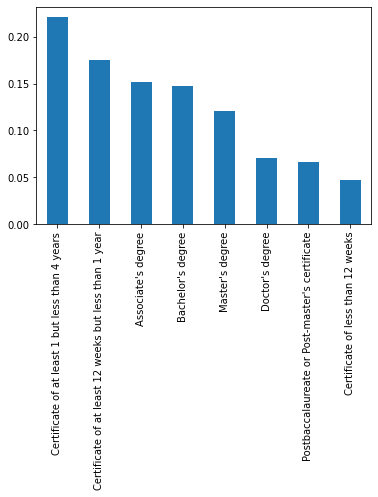

In [27]:
#Provide some descriptive statistics about your target variable.
completions['AWLEVELC2'].describe()

#Provide some descriptive statistics about your target variable.
completions['AWLEVELC2'].value_counts(normalize=True)

#Provide some descriptive statistics about your target variable.
completions['AWLEVELC2'].value_counts(normalize=True).plot(kind='bar')
